<a href="https://colab.research.google.com/github/abhinav70291/My-Projects/blob/main/CTGAN_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [ ]:
!pip install ctgan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 323 kB/s 
     |████████████████████████████████| 1.6 MB 19.1 MB/s 
     |████████████████████████████████| 636 kB 51.8 MB/s 
     |████████████████████████████████| 291 kB 42.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 9.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

Downloading...
From: https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 41.4MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('./insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [ ]:
categorical_features = ['age','sex','children','smoker','region']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Epoch 1, Loss G:  1.7139,Loss D: -0.0040
Epoch 2, Loss G:  1.7498,Loss D: -0.0197
Epoch 3, Loss G:  1.7268,Loss D: -0.0198
Epoch 4, Loss G:  1.8392,Loss D: -0.0175
Epoch 5, Loss G:  1.7663,Loss D: -0.0437
Epoch 6, Loss G:  1.7711,Loss D: -0.0215
Epoch 7, Loss G:  1.8254,Loss D: -0.0942
Epoch 8, Loss G:  1.6953,Loss D: -0.0856
Epoch 9, Loss G:  1.7727,Loss D: -0.0543
Epoch 10, Loss G:  1.6602,Loss D: -0.0561
Epoch 11, Loss G:  1.5462,Loss D:  0.0242
Epoch 12, Loss G:  1.6967,Loss D: -0.0256
Epoch 13, Loss G:  1.5486,Loss D:  0.0359
Epoch 14, Loss G:  1.5795,Loss D:  0.0057
Epoch 15, Loss G:  1.6072,Loss D: -0.0138
Epoch 16, Loss G:  1.6670,Loss D:  0.0686
Epoch 17, Loss G:  1.5462,Loss D: -0.0515
Epoch 18, Loss G:  1.6259,Loss D: -0.0236
Epoch 19, Loss G:  1.5732,Loss D: -0.0761
Epoch 20, Loss G:  1.6013,Loss D: -0.0203
Epoch 21, Loss G:  1.5086,Loss D: -0.0490
Epoch 22, Loss G:  1.5100,Loss D:  0.0170
Epoch 23, Loss G:  1.5423,Loss D: -0.0198
Epoch 24, Loss G:  1.4688,Loss D:  0.0441
E

#Synthetic data generation

In [ ]:
samples = ctgan.sample(1000)

In [ ]:
samples

,age,sex,bmi,children,smoker,region,charges
0,28,male,23.843002,2,no,northwest,5395.416825
1,30,female,19.287026,0,no,northeast,15324.961520
2,32,male,39.435769,2,yes,southwest,7777.564509
3,19,female,25.590652,3,no,southeast,10820.135281
4,31,female,37.862905,1,no,northwest,6453.324656
...,...,...,...,...,...,...,...
995,23,male,20.232958,0,no,southeast,12494.436981
996,21,female,31.894804,1,yes,southeast,4511.261236
997,34,male,19.953252,3,no,northeast,1500.385825
998,55,male,22.062920,2,no,southwest,-2326.721959


#Evaluation

(1338, 7) (1000, 7)


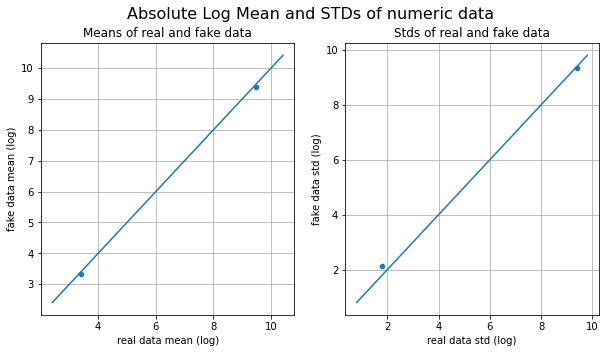

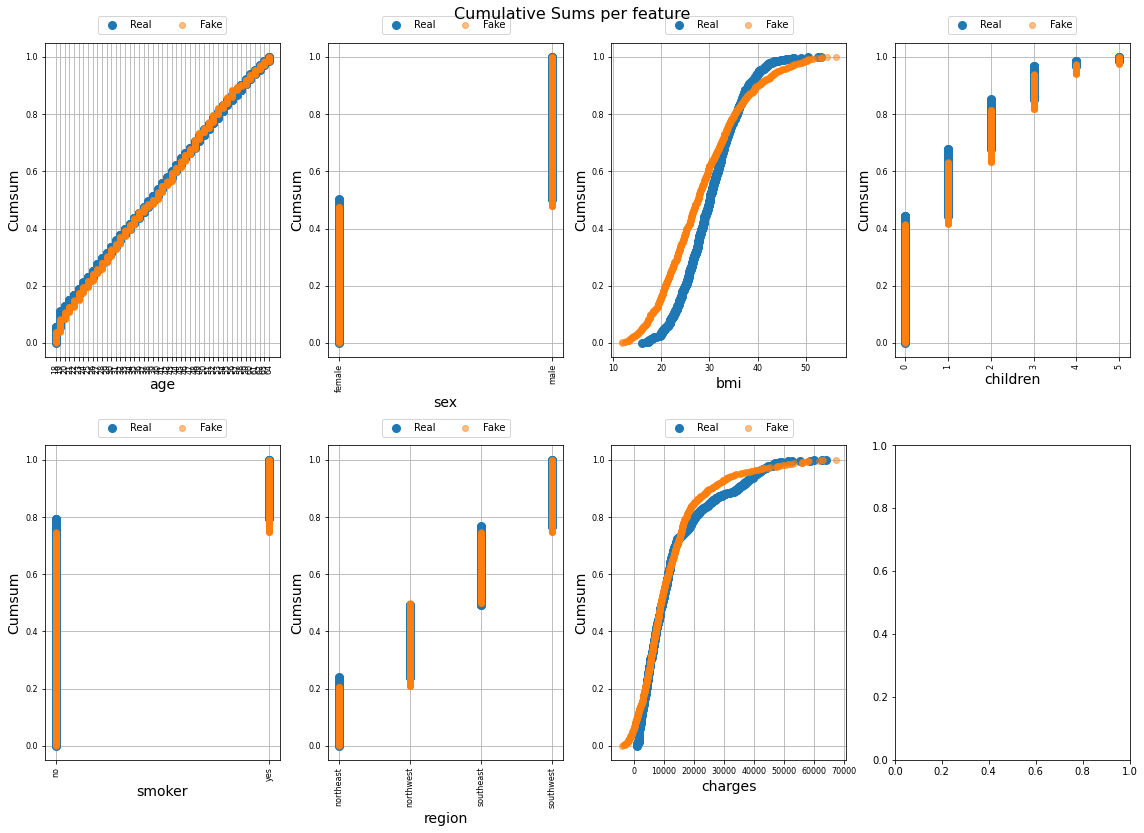

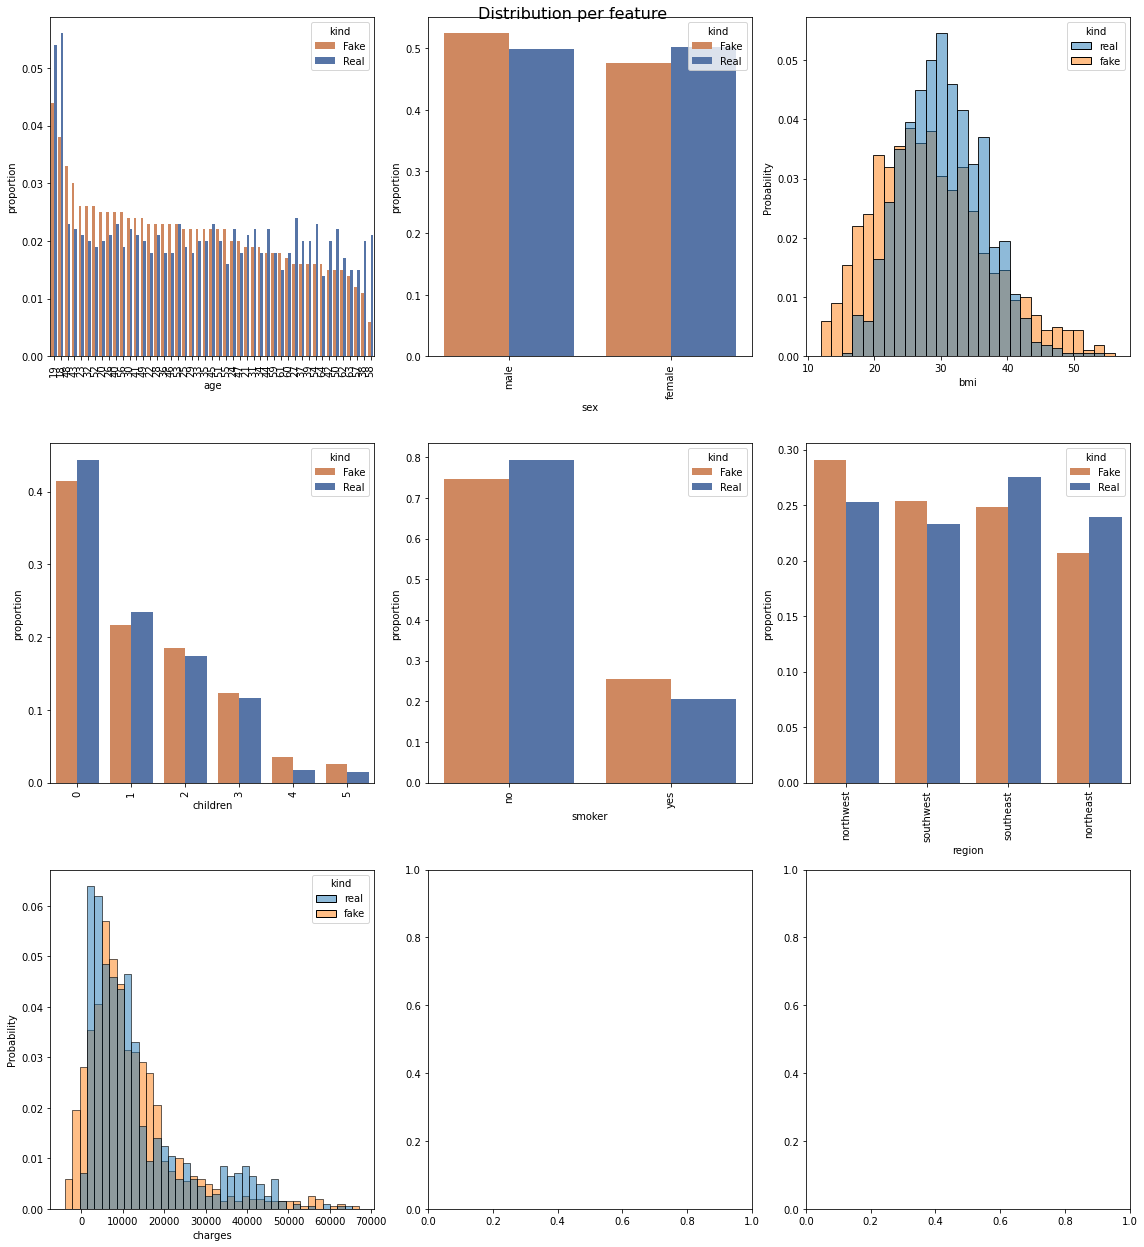

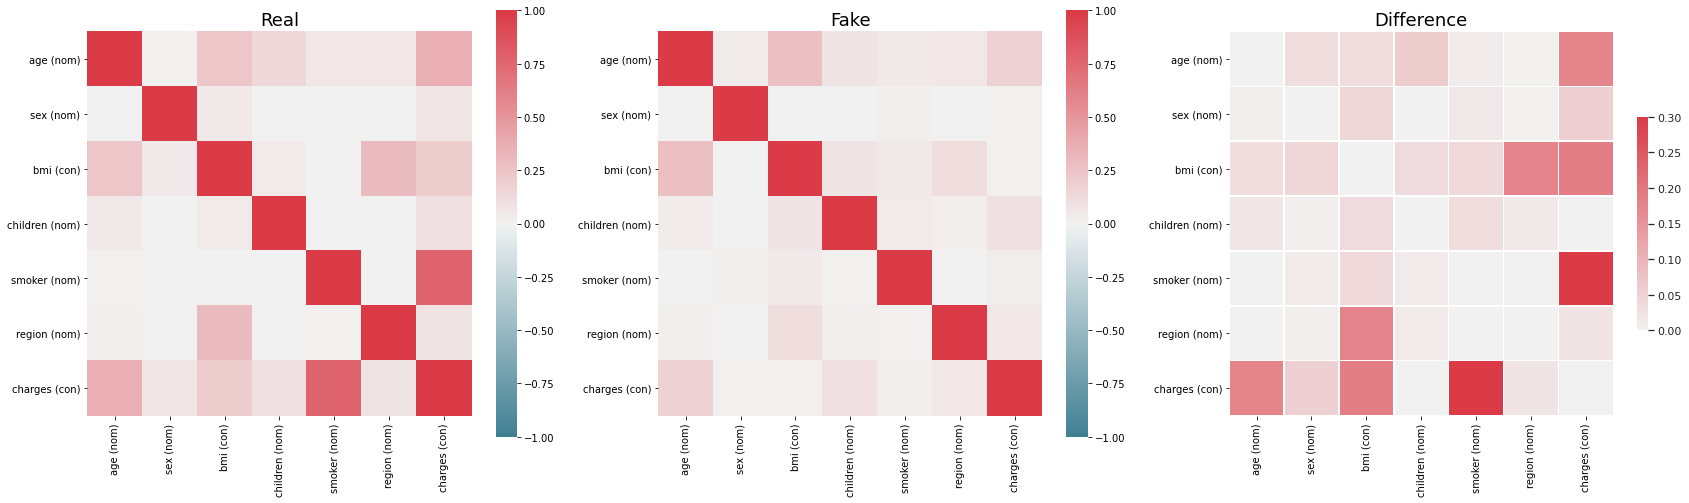

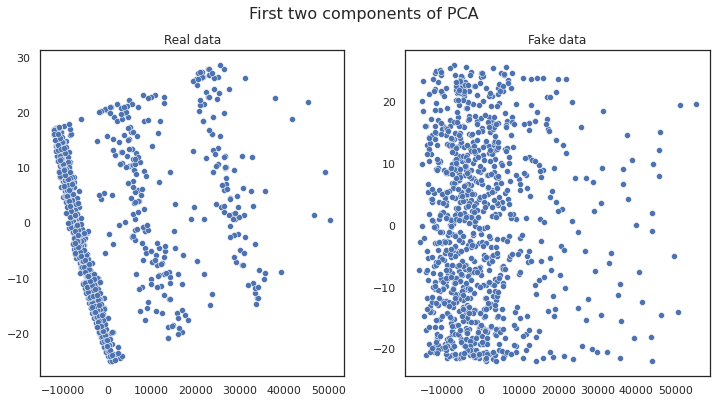

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()